# Plane Normal to a Vector

Colin Ophus - 2023 June 19

Kevin Fiedler - 2023 August 8, Update

This notebook generates an interactive figure to show the generation of a plane normal to a vector.

In [5]:
%matplotlib widget
# %matplotlib notebook
# %matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, art3d, proj3d
from matplotlib.patches import FancyArrowPatch

In [3]:
# Custom 3D arrow function
# Taken from: https://stackoverflow.com/questions/58903383/fancyarrowpatch-in-3d
# fix taken from: https://github.com/matplotlib/matplotlib/issues/21688
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))

        return np.min(zs)

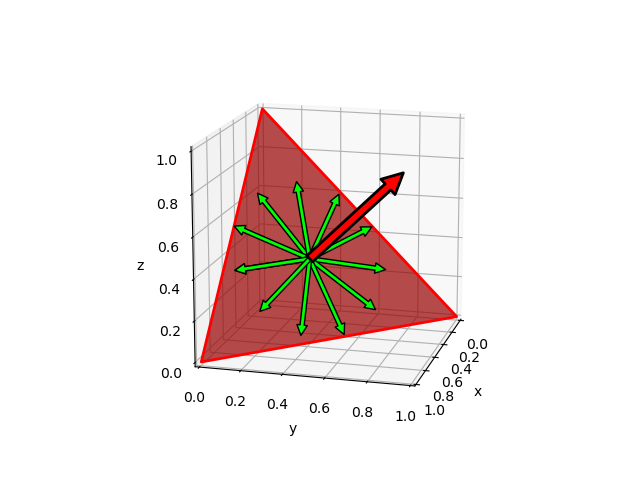

In [4]:
#| label: app:orientation_example_111

%matplotlib widget

# Draw an interactive 3D sketch of the above figure


# Default view
az = 15
el = 15

# triangle patch
p = np.array([
    [0,0,1],
    [0,1,0],
    [1,0,0],    
])
f = np.array([
    [0,1,2],  
])

# main plotting
fig = plt.figure()
ax = fig.add_subplot(
    projection='3d',
    elev=el, 
    azim=az)

# plane
pc = art3d.Poly3DCollection(
    p[f],
    facecolors=[0.6, 0.0, 0.0],
    edgecolor=[1.0, 0.0, 0.0],
    linewidth=2,
    alpha=0.7,
)
ax.add_collection(pc)

# Main arrow
p = np.array((0.34,0.34,0.34))
v = np.array((0.6,0.6,0.6))

arrow_prop_dict = dict(
    mutation_scale=30,
    # arrowstyle = '-|>', 
    arrowstyle = 'Simple', 
    facecolor = (1,0,0,1),
    edgecolor = 'k',
    linewidth = 2,
    shrinkA = 0, 
    shrinkB = 0,
)
a = Arrow3D(
    [p[0], p[0]+v[0]], 
    [p[1], p[1]+v[1]], 
    [p[2], p[2]+v[2]], 
    **arrow_prop_dict)
ax.add_artist(a)

# Other arrows
leng = 0.5
n = np.array((1,1,1)) / np.sqrt(3)
v0 = np.cross(n,(0,0,1))
v1 = np.cross(v0,n)
t = np.linspace(0,2*np.pi,12)
arrow_prop_dict = dict(
    mutation_scale=15,
    # arrowstyle = '-|>', 
    arrowstyle = 'Simple', 
    facecolor = (0,1,0,1),
    edgecolor = 'k',
    linewidth = 1,
    shrinkA = 0, 
    shrinkB = 0,
)
for a0 in range(t.shape[0]):
    d = (v0*np.cos(t[a0]) + v1*np.sin(t[a0])) * leng
    a_add = Arrow3D(
        [p[0], p[0]+d[0]], 
        [p[1], p[1]+d[1]], 
        [p[2], p[2]+d[2]], 
        **arrow_prop_dict)
    ax.add_artist(a_add)

# appearance
plot_limit = np.array(
    [
        [0, 0, 0],
        [1, 1, 1],
    ]
)
ax.invert_yaxis()
ax.axes.set_xlim3d(left=plot_limit[0, 1], right=plot_limit[1, 1])
ax.axes.set_ylim3d(bottom=plot_limit[0, 0], top=plot_limit[1, 0])
ax.axes.set_zlim3d(bottom=plot_limit[0, 2], top=plot_limit[1, 2])
ax.set_box_aspect((1, 1, 1))

# Set the axis labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');